In [1]:
from datasets import load_titanic, balance_classes
from tools import *
from sklearn.metrics import plot_roc_curve
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [3]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [4]:
train_X.shape

(623, 7)

In [5]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [6]:
train_X = polynomial_features(train_X, 2)
test_X = polynomial_features(test_X, 2)
original_X = polynomial_features(original_X, 2)
train_X.shape
features = train_X.columns

In [7]:
scaler = StandardScaler().fit(original_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

original_X = pd.DataFrame(original_X, columns=features)
train_X = pd.DataFrame(train_X, columns=features)
test_X = pd.DataFrame(test_X, columns=features)

In [8]:
model = LogisticRegression(max_iter=150)
model = model.fit(train_X, train_y)

In [9]:
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.8138041733547352
Test score
0.8171641791044776


In [10]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 335, TP: 172, FN: 67, FP: 49
Test
TN: 142, TP: 77, FN: 26, FP: 23


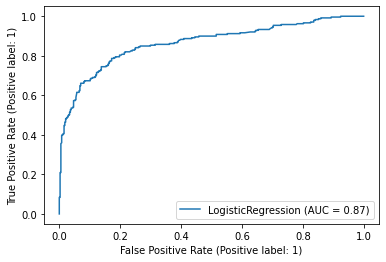

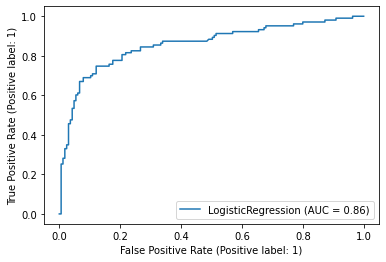

In [11]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)